In [31]:
import os
import pandas as pd
image_fname = 'image.csv'
observation_fname = 'observation.csv'
species_fname = 'species.csv'

In [32]:
# load the image file
imagedf = pd.read_csv(image_fname)
obsdf = pd.read_csv(observation_fname)
speciesdf = pd.read_csv(species_fname)

In [33]:
imagedf.head()

,id,base_url,filepath,site,timestamp
0,1,http://media.itg.wfu.edu/sites/,TAW_2/EK001529.JPG,NaN,2018-02-12 13:03:06.316000
1,2,http://media.itg.wfu.edu/sites/,TAW_2/EK000665.JPG,NaN,2018-02-12 13:03:06.347000
2,3,http://media.itg.wfu.edu/sites/,TAW_2/EK000213.JPG,NaN,2018-02-12 13:03:06.376000
3,4,http://media.itg.wfu.edu/sites/,TAW_2/EK001473.JPG,NaN,2018-02-12 13:03:06.392000
4,5,http://media.itg.wfu.edu/sites/,TAW_2/EK000152.JPG,NaN,2018-02-12 13:03:06.408000


In [34]:
obsdf.head()

,id,image_id,user_id,species_id,count,notes,_overlay,timestamp
0,1,1,2,49,0,NaN,NaN,2018-02-12 13:20:28.231000
1,2,2,2,49,0,NaN,NaN,2018-02-12 13:20:34.377000
2,3,3,2,49,0,NaN,NaN,2018-02-12 13:21:09.282000
3,4,4,2,49,0,NaN,NaN,2018-02-12 13:21:15.759000
4,5,5,2,49,0,NaN,NaN,2018-02-12 13:21:27.033000


In [39]:
# merge left-dataframe (obsdf) to right-dataframe (imagedf) on columns 'obsdf.image_id' to 'imagedf.id'
cdf = pd.merge(obsdf, imagedf, left_on=['image_id'], right_on=['id'])

In [40]:
cdf.head()

,id_x,image_id,user_id,species_id,count,notes,_overlay,timestamp_x,id_y,base_url,filepath,site,timestamp_y
0,1,1,2,49,0,NaN,NaN,2018-02-12 13:20:28.231000,1,http://media.itg.wfu.edu/sites/,TAW_2/EK001529.JPG,NaN,2018-02-12 13:03:06.316000
1,2,2,2,49,0,NaN,NaN,2018-02-12 13:20:34.377000,2,http://media.itg.wfu.edu/sites/,TAW_2/EK000665.JPG,NaN,2018-02-12 13:03:06.347000
2,3,3,2,49,0,NaN,NaN,2018-02-12 13:21:09.282000,3,http://media.itg.wfu.edu/sites/,TAW_2/EK000213.JPG,NaN,2018-02-12 13:03:06.376000
3,4,4,2,49,0,NaN,NaN,2018-02-12 13:21:15.759000,4,http://media.itg.wfu.edu/sites/,TAW_2/EK001473.JPG,NaN,2018-02-12 13:03:06.392000
4,5,5,2,49,0,NaN,NaN,2018-02-12 13:21:27.033000,5,http://media.itg.wfu.edu/sites/,TAW_2/EK000152.JPG,NaN,2018-02-12 13:03:06.408000


In [41]:
# save preliminary merge
cdf.to_csv('combo.csv')

In [42]:
# drop uneeded columns
# notes, _overlay, site, timestamp_y
sdf = cdf.drop(columns=['notes', '_overlay','site', 'timestamp_y'], axis=1)
sdf.head()

,id_x,image_id,user_id,species_id,count,timestamp_x,id_y,base_url,filepath
0,1,1,2,49,0,2018-02-12 13:20:28.231000,1,http://media.itg.wfu.edu/sites/,TAW_2/EK001529.JPG
1,2,2,2,49,0,2018-02-12 13:20:34.377000,2,http://media.itg.wfu.edu/sites/,TAW_2/EK000665.JPG
2,3,3,2,49,0,2018-02-12 13:21:09.282000,3,http://media.itg.wfu.edu/sites/,TAW_2/EK000213.JPG
3,4,4,2,49,0,2018-02-12 13:21:15.759000,4,http://media.itg.wfu.edu/sites/,TAW_2/EK001473.JPG
4,5,5,2,49,0,2018-02-12 13:21:27.033000,5,http://media.itg.wfu.edu/sites/,TAW_2/EK000152.JPG


In [44]:
# create a "url" combined column of base_url and filepath, will make extraction easier later.
sdf['url']=sdf['base_url'] + sdf['filepath']
sdf.head()

,id_x,image_id,user_id,species_id,count,timestamp_x,id_y,base_url,filepath,url
0,1,1,2,49,0,2018-02-12 13:20:28.231000,1,http://media.itg.wfu.edu/sites/,TAW_2/EK001529.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK001529.JPG
1,2,2,2,49,0,2018-02-12 13:20:34.377000,2,http://media.itg.wfu.edu/sites/,TAW_2/EK000665.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000665.JPG
2,3,3,2,49,0,2018-02-12 13:21:09.282000,3,http://media.itg.wfu.edu/sites/,TAW_2/EK000213.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000213.JPG
3,4,4,2,49,0,2018-02-12 13:21:15.759000,4,http://media.itg.wfu.edu/sites/,TAW_2/EK001473.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK001473.JPG
4,5,5,2,49,0,2018-02-12 13:21:27.033000,5,http://media.itg.wfu.edu/sites/,TAW_2/EK000152.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000152.JPG


In [45]:
# create a get_site() function that extracts information from the filepath
def get_site(s):
    return str(s).split('/')[0].split()[-1]
sdf['site']=sdf.apply(lambda x: get_site(x['filepath']), axis=1)

In [46]:
# check the new column to see if it matches up
sdf.tail()

,id_x,image_id,user_id,species_id,count,timestamp_x,id_y,base_url,filepath,url,site
63258,63413,105370,2,49,0,2019-03-20 08:35:21.393628,105370,http://media.itg.wfu.edu/sites/,SOT_06_2017/EK000445.JPG,http://media.itg.wfu.edu/sites/SOT_06_2017/EK0...,SOT_06_2017
63259,63416,89509,10,49,0,2019-03-31 20:19:01.476156,89509,http://media.itg.wfu.edu/sites/,KIT_05_2017/102EK113/04020306.JPG,http://media.itg.wfu.edu/sites/KIT_05_2017/102...,KIT_05_2017
63260,63417,89509,10,49,0,2019-03-31 20:19:05.571589,89509,http://media.itg.wfu.edu/sites/,KIT_05_2017/102EK113/04020306.JPG,http://media.itg.wfu.edu/sites/KIT_05_2017/102...,KIT_05_2017
63261,63418,101691,10,49,0,2019-03-31 20:19:07.952041,101691,http://media.itg.wfu.edu/sites/,KMS_05_2017/100EK113/EK000413.JPG,http://media.itg.wfu.edu/sites/KMS_05_2017/100...,KMS_05_2017
63262,63419,60586,10,47,2,2019-03-31 20:19:21.164714,60586,http://media.itg.wfu.edu/sites/,BIL_07_2017/100EK113/EK000608.JPG,http://media.itg.wfu.edu/sites/BIL_07_2017/100...,BIL_07_2017


In [47]:
# look at the head of the species table for column names
speciesdf.head()

,id,name,ref_url,data
0,1,aardvark,NaN,"{""omnivore"": false, ""carnivore"": false, ""LBr"":..."
1,2,aardwolf,NaN,"{""omnivore"": false, ""carnivore"": false, ""LBr"":..."
2,3,baboon,NaN,"{""omnivore"": true, ""carnivore"": false, ""LBr"": ..."
3,4,batEaredFox,NaN,"{""omnivore"": false, ""carnivore"": false, ""LBr"":..."
4,5,buffalo,NaN,"{""omnivore"": false, ""carnivore"": false, ""LBr"":..."


In [50]:
# create a new column with the species name, takes several steps
# step 1 merge
mdf = pd.merge(sdf,speciesdf,left_on='species_id', right_on='id')
# clean up unwanted columns
mdf = mdf.drop(columns=['id','ref_url','data'], axis=1)
# rename 'name' to 'species'
mdf.rename(columns={'name':'species'}, inplace=True)
mdf.tail()

,id_x,image_id,user_id,species_id,count,timestamp_x,id_y,base_url,filepath,url,site,species
63258,32612,50305,4,27,1,2018-09-28 16:25:02.480236,50305,http://media.itg.wfu.edu/sites/,BIL_03_2017/100EK113/EK002392.JPG,http://media.itg.wfu.edu/sites/BIL_03_2017/100...,BIL_03_2017,koriBustard
63259,35856,51773,21,28,1,2018-10-22 15:27:17.663311,51773,http://media.itg.wfu.edu/sites/,SOT_02_2017/EK001256.JPG,http://media.itg.wfu.edu/sites/SOT_02_2017/EK0...,SOT_02_2017,leopard
63260,61131,106741,5,28,1,2019-01-01 17:14:26.001084,106741,http://media.itg.wfu.edu/sites/,KIR_05_2017/EK001316.JPG,http://media.itg.wfu.edu/sites/KIR_05_2017/EK0...,KIR_05_2017,leopard
63261,35857,34525,21,40,1,2018-10-22 15:32:07.773267,34525,http://media.itg.wfu.edu/sites/,SIM_03_2017/EK002449.JPG,http://media.itg.wfu.edu/sites/SIM_03_2017/EK0...,SIM_03_2017,serval
63262,46947,50919,3,30,1,2018-11-18 17:34:20.159755,50919,http://media.itg.wfu.edu/sites/,SOT_02_2017/EK001255.JPG,http://media.itg.wfu.edu/sites/SOT_02_2017/EK0...,SOT_02_2017,lionMale


In [51]:
# extract a species string, check if batEaredFox
this_species = str(speciesdf[speciesdf.id==4]['name']).split('\n')[0].split()[-1]
assert(this_species=='batEaredFox')
this_species

'batEaredFox'

In [18]:
# look up the actual species name from the species_id column
# we have the species lookup in speciesdf
# this is a little awkward, but works for now.
def get_species(species_id):
    return str(speciesdf[speciesdf.id==int(species_id)]['name']).split('\n')[0].split()[-1]
assert(get_species(47)=='zebra')

In [53]:
# show some image observations on species (e.g. species not equal to nothing)
mdf[mdf.species != 'NOTHING'].tail()

,id_x,image_id,user_id,species_id,count,timestamp_x,id_y,base_url,filepath,url,site,species
63258,32612,50305,4,27,1,2018-09-28 16:25:02.480236,50305,http://media.itg.wfu.edu/sites/,BIL_03_2017/100EK113/EK002392.JPG,http://media.itg.wfu.edu/sites/BIL_03_2017/100...,BIL_03_2017,koriBustard
63259,35856,51773,21,28,1,2018-10-22 15:27:17.663311,51773,http://media.itg.wfu.edu/sites/,SOT_02_2017/EK001256.JPG,http://media.itg.wfu.edu/sites/SOT_02_2017/EK0...,SOT_02_2017,leopard
63260,61131,106741,5,28,1,2019-01-01 17:14:26.001084,106741,http://media.itg.wfu.edu/sites/,KIR_05_2017/EK001316.JPG,http://media.itg.wfu.edu/sites/KIR_05_2017/EK0...,KIR_05_2017,leopard
63261,35857,34525,21,40,1,2018-10-22 15:32:07.773267,34525,http://media.itg.wfu.edu/sites/,SIM_03_2017/EK002449.JPG,http://media.itg.wfu.edu/sites/SIM_03_2017/EK0...,SIM_03_2017,serval
63262,46947,50919,3,30,1,2018-11-18 17:34:20.159755,50919,http://media.itg.wfu.edu/sites/,SOT_02_2017/EK001255.JPG,http://media.itg.wfu.edu/sites/SOT_02_2017/EK0...,SOT_02_2017,lionMale


In [54]:
# top ten species observed
mdf.species.value_counts()[:10]

NOTHING            53126
wildebeest          3180
zebra               2519
impala               992
gazelleThomsons      776
topi                 539
gazelleGrants        322
buffalo              302
warthog              224
giraffe              198
Name: species, dtype: int64

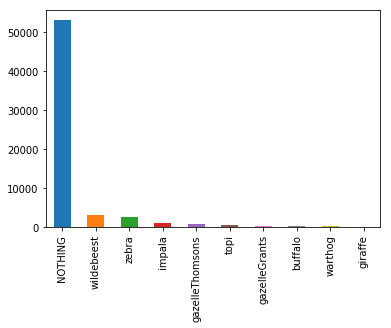

In [56]:
mdf.species.value_counts()[:10].plot.bar()

In [57]:
# finally, save the data product
mdf.to_csv('merged_data.csv')